In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
dataset_dir = r"C:\Users\sarve\Desktop\dl\datasets\caltech-101"

train_datagen = ImageDataGenerator(
    rescale=1.0/255,           
    rotation_range=20,         
    width_shift_range=0.2,     
    height_shift_range=0.2,   
    shear_range=0.2,           
    zoom_range=0.2,            
    horizontal_flip=True,      
    validation_split=0.2       
)

train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),      
    batch_size=32,
    class_mode='categorical',  
    subset='training'          
)

val_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'      
)

print("Classes found:", train_generator.class_indices)

Found 7356 images belonging to 102 classes.
Found 1788 images belonging to 102 classes.
Classes found: {'BACKGROUND_Google': 0, 'Faces': 1, 'Faces_easy': 2, 'Leopards': 3, 'Motorbikes': 4, 'accordion': 5, 'airplanes': 6, 'anchor': 7, 'ant': 8, 'barrel': 9, 'bass': 10, 'beaver': 11, 'binocular': 12, 'bonsai': 13, 'brain': 14, 'brontosaurus': 15, 'buddha': 16, 'butterfly': 17, 'camera': 18, 'cannon': 19, 'car_side': 20, 'ceiling_fan': 21, 'cellphone': 22, 'chair': 23, 'chandelier': 24, 'cougar_body': 25, 'cougar_face': 26, 'crab': 27, 'crayfish': 28, 'crocodile': 29, 'crocodile_head': 30, 'cup': 31, 'dalmatian': 32, 'dollar_bill': 33, 'dolphin': 34, 'dragonfly': 35, 'electric_guitar': 36, 'elephant': 37, 'emu': 38, 'euphonium': 39, 'ewer': 40, 'ferry': 41, 'flamingo': 42, 'flamingo_head': 43, 'garfield': 44, 'gerenuk': 45, 'gramophone': 46, 'grand_piano': 47, 'hawksbill': 48, 'headphone': 49, 'hedgehog': 50, 'helicopter': 51, 'ibis': 52, 'inline_skate': 53, 'joshua_tree': 54, 'kangaroo':

In [3]:
from tensorflow.keras import Input
model = models.Sequential([
    Input(shape=(64, 64, 3)),                    # Input layer
    layers.Conv2D(32, (3,3), activation='relu'), # 1st Convolution layer
    layers.MaxPooling2D(2, 2),                   # 1st Pooling layer
    
    layers.Conv2D(64, (3,3), activation='relu'), # 2nd Convolution layer
    layers.MaxPooling2D(2, 2),                   # 2nd Pooling layer
    
    layers.Conv2D(128, (3,3), activation='relu'),# 3rd Convolution layer
    layers.MaxPooling2D(2, 2),                   # 3rd Pooling layer
    
    layers.Flatten(),                            # Flatten layer
    layers.Dense(256, activation='relu'),        # Fully connected layer
    layers.Dropout(0.5),                         # Dropout for regularization
    layers.Dense(train_generator.num_classes, activation='softmax') # Output layer
])

# Print model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 102)                 │          26,214 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,299,366 (4.96 MB)

 Trainable params: 1,299,366 (4.96 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10
)


Epoch 1/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - accuracy: 0.1315 - loss: 4.1575 - val_accuracy: 0.2030 - val_loss: 3.8708
Epoch 2/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 303ms/step - accuracy: 0.2531 - loss: 3.5922 - val_accuracy: 0.2522 - val_loss: 3.5131
Epoch 3/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 69s 299ms/step - accuracy: 0.2987 - loss: 3.2915 - val_accuracy: 0.2802 - val_loss: 3.1994
Epoch 4/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 70s 303ms/step - accuracy: 0.3248 - loss: 3.1049 - val_accuracy: 0.3384 - val_loss: 2.9820
Epoch 5/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 72s 315ms/step - accuracy: 0.3388 - loss: 2.9710 - val_accuracy: 0.3535 - val_loss: 2.8764
Epoch 6/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 109s 472ms/step - accuracy: 0.3675 - loss: 2.8394 - val_accuracy: 0.3574 - val_loss: 2.8268
Epoch 7/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 90s 390ms/step - accuracy: 0.3791 - loss: 2.7267 - val_accuracy: 0.3775 - val_loss: 2.7039
Epoch 8/10
230/230 ━━━━━━━━━━━━━━━━━━━━ 97s 420ms/step - accuracy: 0.3922 - loss: 2.

56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step - accuracy: 0.4262 - loss: 2.4869
Validation Loss: 2.487
Validation Accuracy: 0.426


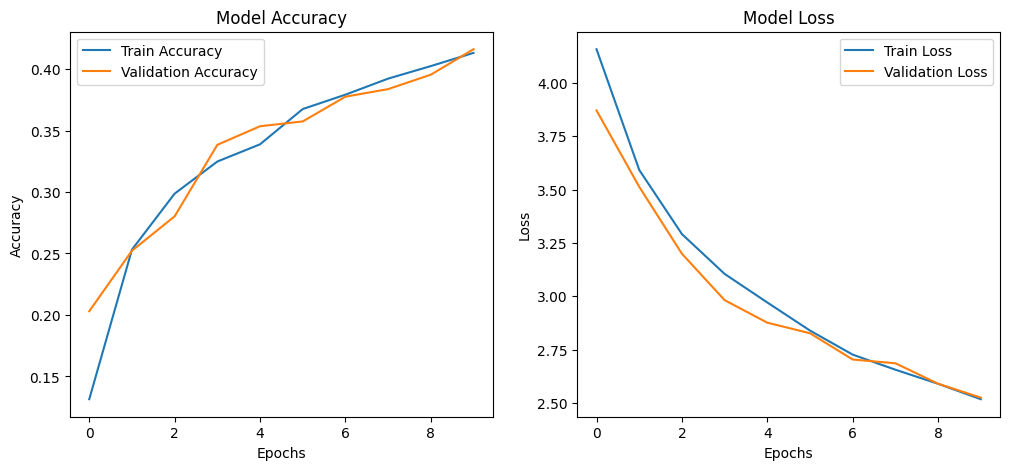

In [5]:

val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Loss: {val_loss:.3f}")
print(f"Validation Accuracy: {val_acc:.3f}")


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [6]:
from tensorflow.keras.preprocessing import image

img_path = r"C:\Users\sarve\Desktop\dl\datasets\caltech-101\airplanes\image_0001.jpg"
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print("Predicted Class:", list(train_generator.class_indices.keys())[predicted_class])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
Predicted Class: airplanes
